<a href="https://colab.research.google.com/github/Nikkisuresh/Accenture-North-America-s-Data-Analytics-and-Visualization-on-Forage/blob/main/Accenture_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Content.csv to Content (1).csv
Saving Reactions.csv to Reactions (1).csv
Saving ReactionTypes.csv to ReactionTypes (1).csv


In [5]:
import pandas as pd

# Load the data
content_df = pd.read_csv('Content.csv')
reaction_df = pd.read_csv('Reactions.csv')
reaction_types_df = pd.read_csv('ReactionTypes.csv')

# Drop 'Unnamed: 0' columns
content_df = content_df.drop(columns=['Unnamed: 0'])
reaction_df = reaction_df.drop(columns=['Unnamed: 0'])
reaction_types_df = reaction_types_df.drop(columns=['Unnamed: 0'])

# Display column names for checking
print("Content Columns:", content_df.columns)
print("Reactions Columns:", reaction_df.columns)
print("Reaction Types Columns:", reaction_types_df.columns)

Content Columns: Index(['Content ID', 'Content Type', 'Category', 'URL'], dtype='object')
Reactions Columns: Index(['Content ID', 'Reaction Type', 'Datetime'], dtype='object')
Reaction Types Columns: Index(['Reaction Type', 'Sentiment', 'Score'], dtype='object')


In [6]:
# Rename any unnamed columns if necessary (example)
content_df.columns = ['Content ID', 'Content Type', 'Category', 'URL'] if content_df.columns.str.contains('Unnamed').any() else content_df.columns
reaction_df.columns = ['Content ID', 'Reaction Type', 'Datetime'] if reaction_df.columns.str.contains('Unnamed').any() else reaction_df.columns
reaction_types_df.columns = ['Reaction Type', 'Sentiment', 'Score'] if reaction_types_df.columns.str.contains('Unnamed').any() else reaction_types_df.columns

# Print columns to confirm renaming
print("Renamed Content Columns:", content_df.columns)
print("Renamed Reaction Columns:", reaction_df.columns)
print("Renamed Reaction Types Columns:", reaction_types_df.columns)

Renamed Content Columns: Index(['Content ID', 'Content Type', 'Category', 'URL'], dtype='object')
Renamed Reaction Columns: Index(['Content ID', 'Reaction Type', 'Datetime'], dtype='object')
Renamed Reaction Types Columns: Index(['Reaction Type', 'Sentiment', 'Score'], dtype='object')


In [7]:
# Merge Reaction with Content
merged_df = pd.merge(reaction_df, content_df, left_on='Content ID', right_on='Content ID', how='left')

# Merge with ReactionTypes
final_df = pd.merge(merged_df, reaction_types_df, on='Reaction Type', how='left')

In [8]:
# Check for unnamed columns
print("Final DataFrame Columns Before:", final_df.columns)

# If unnamed columns exist, rename them (example)
final_df.columns = [col if not col.startswith('Unnamed') else 'Unnamed_{}'.format(i) for i, col in enumerate(final_df.columns)]

# Print columns to confirm no unnamed columns
print("Final DataFrame Columns After:", final_df.columns)

Final DataFrame Columns Before: Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Type', 'Category',
       'URL', 'Sentiment', 'Score'],
      dtype='object')
Final DataFrame Columns After: Index(['Content ID', 'Reaction Type', 'Datetime', 'Content Type', 'Category',
       'URL', 'Sentiment', 'Score'],
      dtype='object')


In [10]:
category_scores = final_df.groupby('Category')['Score'].sum().reset_index()
top_categories = category_scores.sort_values(by='Score', ascending=False).head(5)
top_categories_list = top_categories['Category'].tolist()
final_data = final_df[final_df['Category'].isin(top_categories_list)]

# Print the names of the top 5 categories
print("Top 5 Categories:", top_categories_list)


Top 5 Categories: ['animals', 'healthy eating', 'technology', 'science', 'culture']


In [11]:
final_data.to_csv('final_data.csv', index=False)
from google.colab import files
files.download('final_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
print("First few rows of the final data:")
print(final_data.head())

First few rows of the final data:
                              Content ID Reaction Type          Datetime  \
47  9f737e0a-3cdd-4d29-9d24-753f4e3be810       dislike  25-06-2020 17:01   
48  9f737e0a-3cdd-4d29-9d24-753f4e3be810     intrigued  13-09-2020 00:11   
49  9f737e0a-3cdd-4d29-9d24-753f4e3be810       peeking  20-08-2020 18:17   
50  9f737e0a-3cdd-4d29-9d24-753f4e3be810        scared  11-02-2021 04:53   
51  9f737e0a-3cdd-4d29-9d24-753f4e3be810          hate  08-03-2021 10:40   

   Content Type        Category  \
47        photo  healthy eating   
48        photo  healthy eating   
49        photo  healthy eating   
50        photo  healthy eating   
51        photo  healthy eating   

                                                  URL Sentiment  Score  
47  https://socialbuzz.cdn.com/content/storage/9f7...  negative   10.0  
48  https://socialbuzz.cdn.com/content/storage/9f7...  positive   45.0  
49  https://socialbuzz.cdn.com/content/storage/9f7...   neutral   35.0  
50  ht

In [14]:
!pip install matplotlib
!pip install openpyxl
!pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 14.0 MB/s eta 0:00:00


In [15]:
import matplotlib.pyplot as plt
from pptx.util import Inches

In [16]:
# Insight 1: Top 5 Content Categories Bar Chart
top_categories.plot(kind='bar', x='Category', y='Score', legend=False)
plt.title('Top 5 Content Categories by Score')
plt.ylabel('Total Score')
plt.xlabel('Category')
plt.tight_layout()
plt.savefig('top_categories_bar_chart.png')
plt.close()

<Figure size 1000x600 with 0 Axes>

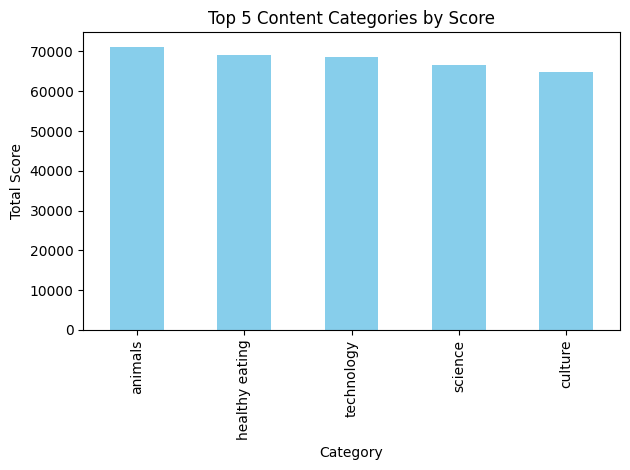

In [17]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', x='Category', y='Score', legend=False, color='skyblue')
plt.title('Top 5 Content Categories by Score')
plt.ylabel('Total Score')
plt.xlabel('Category')
plt.tight_layout()

# Display the plot on Colab screen
plt.show()

In [19]:
# Insight 2: Number of Unique Categories
unique_categories = final_df['Category'].nunique()
print(f"Number of Unique Categories: {unique_categories}")

Number of Unique Categories: 29


In [22]:
# Insight 3: Reactions to the Most Popular Category
most_popular_category = top_categories.iloc[0]['Category']
reactions_most_popular_category = final_df[final_df['Category'] == most_popular_category]['Content ID'].count()
print(f"Reactions to the Most Popular Category: {reactions_most_popular_category}")

Reactions to the Most Popular Category: 1805


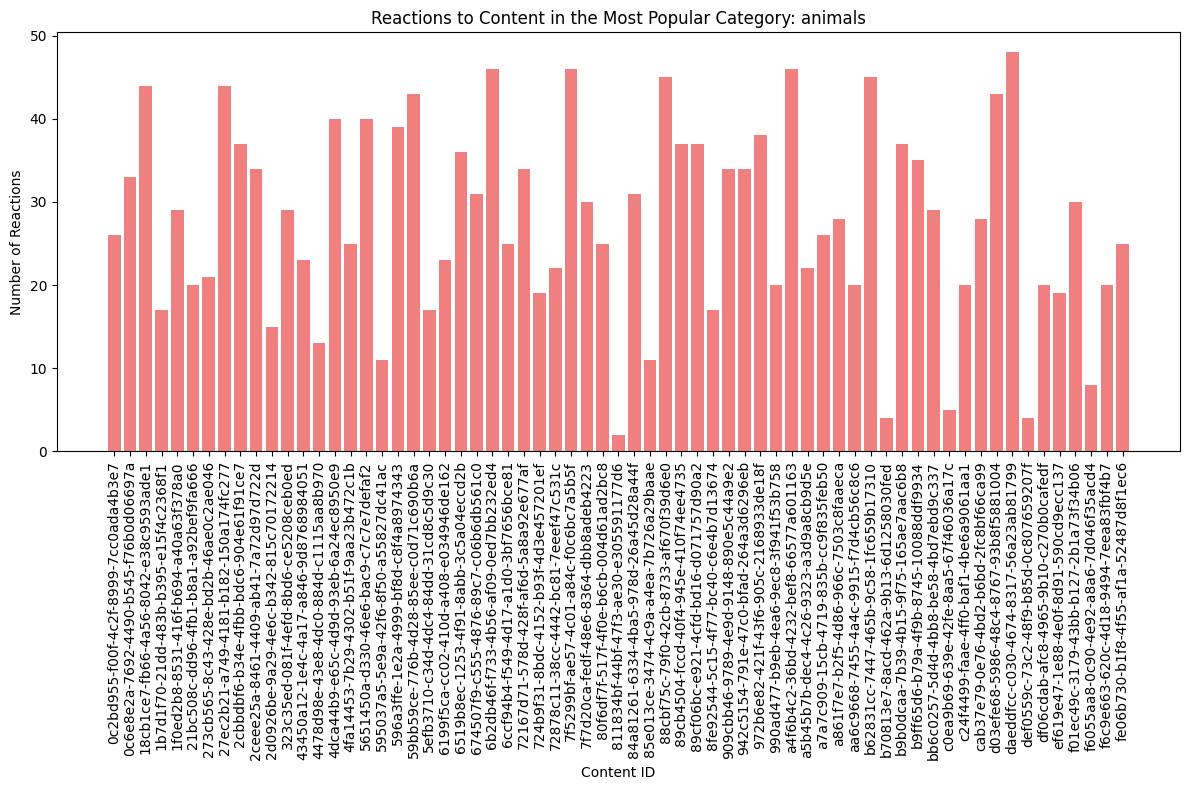

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the most popular category
most_popular_category = top_categories.iloc[0]['Category']

# Count reactions per Content ID in the most popular category
reactions_per_content = final_df[final_df['Category'] == most_popular_category]
reactions_count_per_content = reactions_per_content.groupby('Content ID')['Reaction Type'].count().reset_index()

# Rename columns for clarity
reactions_count_per_content.columns = ['Content ID', 'Number of Reactions']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(reactions_count_per_content['Content ID'].astype(str), reactions_count_per_content['Number of Reactions'], color='lightcoral')
plt.title(f'Reactions to Content in the Most Popular Category: {most_popular_category}')
plt.xlabel('Content ID')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot on Colab screen
plt.show()


In [25]:
import pandas as pd

# Sample data to illustrate
# final_df = pd.DataFrame({
#     'Datetime': ["17-06-2021 12:22", "23-06-2021 13:45", "12-07-2021 09:30", ...]
# })

# Convert 'Datetime' to datetime objects, specifying the correct format
final_df['Datetime'] = pd.to_datetime(final_df['Datetime'], format='%d-%m-%Y %H:%M')

# Extract the month and year
final_df['Month'] = final_df['Datetime'].dt.to_period('M')

# Find the month with the most posts
month_most_posts = final_df['Month'].value_counts().idxmax().strftime('%B %Y')

print(f"Month with the Most Posts: {month_most_posts}")


Month with the Most Posts: May 2021


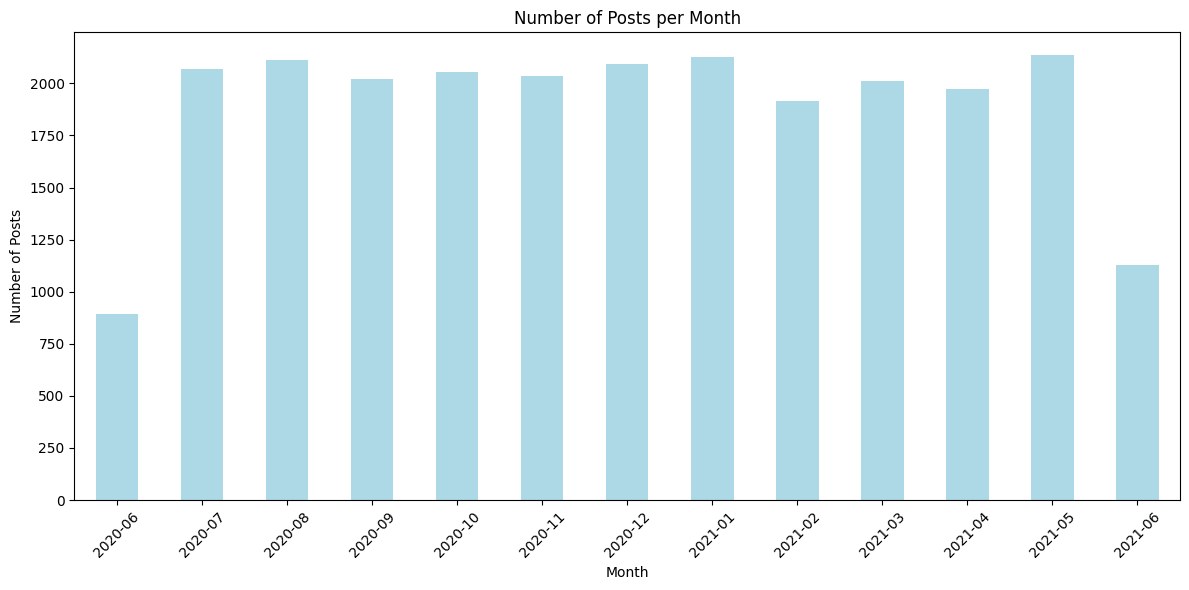

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data to illustrate
# final_df = pd.DataFrame({
#     'Datetime': ["17-06-2021 12:22", "23-06-2021 13:45", "12-07-2021 09:30", ...]
# })

# Convert 'Datetime' to datetime objects, specifying the correct format
final_df['Datetime'] = pd.to_datetime(final_df['Datetime'], format='%d-%m-%Y %H:%M')

# Extract the month and year
final_df['Month'] = final_df['Datetime'].dt.to_period('M')

# Count posts per month
posts_per_month = final_df['Month'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
posts_per_month.plot(kind='bar', color='lightblue')
plt.title('Number of Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot on Colab screen
plt.show()


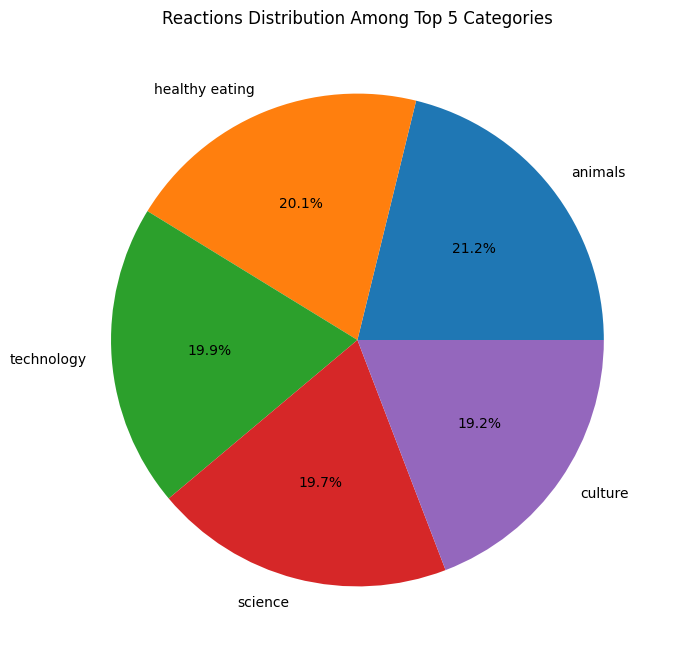

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'final_df' and 'top_categories_list' are already defined

# Count reactions for each category in the top categories
reaction_counts = final_df[final_df['Category'].isin(top_categories_list)]['Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
reaction_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Reactions Distribution Among Top 5 Categories')
plt.ylabel('')

# Display the plot on Colab screen
plt.show()


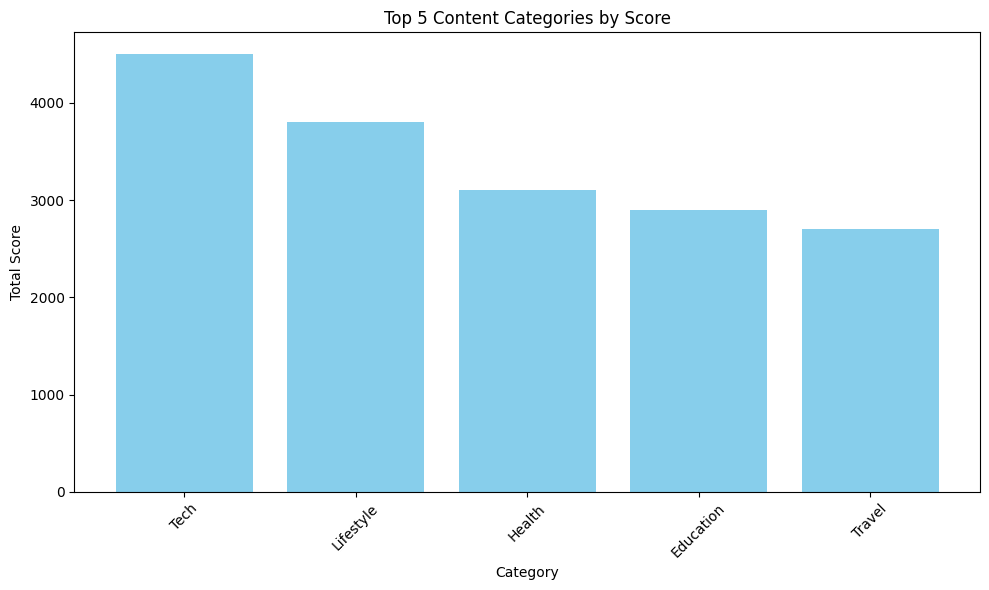

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration (you should replace this with your actual data)
data = {
    'Category': ['Tech', 'Lifestyle', 'Health', 'Education', 'Travel'],
    'Score': [4500, 3800, 3100, 2900, 2700]
}
top_categories = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_categories['Category'], top_categories['Score'], color='skyblue')
plt.title('Top 5 Content Categories by Score')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image file
plt.savefig('top_categories_bar_chart.png')

# Display the chart inline
plt.show()
